# Task 5 — Image Generation

In this activity, you'll explore how we can **create images from text prompts** using a **[Stable Diffusion model](https://huggingface.co/stabilityai/stable-diffusion-2)**.  
You can describe *anything you can imagine* — and watch the AI paint it for you.  Some example prompts you could use are:
- “A cute robot painting a landscape”  
- “A watercolor painting of mountains at sunset”  
- “A dog wearing sunglasses on Mars”  
- “A city skyline in cyberpunk style”  

---

### Video for this Task

Watch this video to understand how image generation works: [Diffusion Models for AI Image Generation](https://www.youtube.com/watch?v=x2GRE-RzmD8)

---



In [10]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

Generating: a cute robot painting a landscape


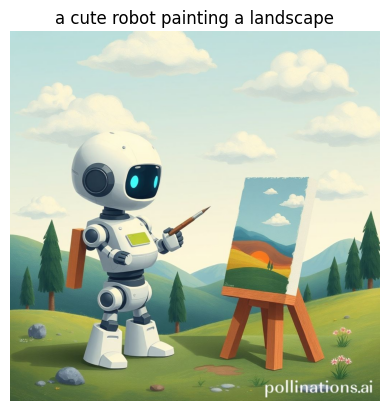

In [13]:
# Example 1: let's see how we can use a pretrained image generation model

# Prompt for image generation
prompt = "a cute robot painting a landscape"
print(f"Generating: {prompt}")

# Pollinations API (no key needed)
url = f"https://image.pollinations.ai/prompt/{prompt}"

# Fetch image
response = requests.get(url)
image = Image.open(BytesIO(response.content))

# Display
plt.imshow(image)
plt.axis("off")
plt.title(prompt)
plt.show()

Generating: a futuristic city skyline, digital art, neon colors


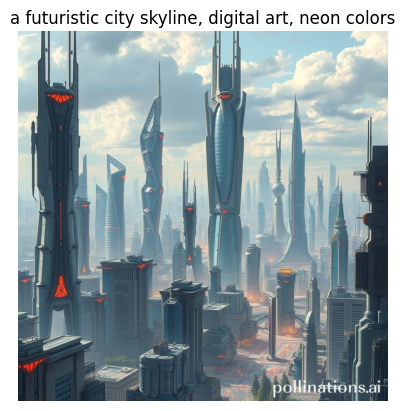

In [14]:
# Example 2: Try different artistic styles
prompt = "a futuristic city skyline, digital art, neon colors"
print(f"Generating: {prompt}")

# Pollinations API (no key needed)
url = f"https://image.pollinations.ai/prompt/{prompt}"

# Fetch image
response = requests.get(url)
image = Image.open(BytesIO(response.content))

# Display
plt.imshow(image)
plt.axis("off")
plt.title(prompt)
plt.show()


### Image Remix Challenge!

Try these creative exercises:

1. **Prompt Transformation**  
   Start with a basic prompt like “a castle on a hill.”  
   Then modify it to create 3 new styles:
   - “in watercolor style”
   - “as a Lego model”
   - “in the style of Van Gogh”

2. **Creative Mashup**  
   Combine two unrelated concepts in one prompt.  
   For example: “a dragon playing basketball” or “a robot cooking pasta.”
